In [16]:
# Import PyMOL modules
from pymol import cmd

# Start PyMOL (optional: you can also directly use the command if PyMOL is open)
cmd.reinitialize()

# Load the PDB structure
cmd.load("/home/hp/nayanika/github/GPX6/prep_structures/original_mousecys.pdb")

# Define the residue of interest and cutoff distance
residue_of_interest = "resi 177 and chain X"
cutoff_distance = 5.0

# Select atoms within the cutoff distance from the residue of interest
cmd.select("interacting_atoms", f"br. all within {cutoff_distance} of ({residue_of_interest})")

# Select entire interacting residues
cmd.select("interacting_residues", "byres interacting_atoms")

# Show the residue and interacting atoms
cmd.show("sticks", residue_of_interest)
cmd.show("spheres", "interacting_atoms")

# Color the residue and interacting atoms for better contrast
cmd.color("yellow", residue_of_interest)  # Color the residue yellow
cmd.color("red", "interacting_atoms")     # Color interacting atoms red

# Zoom into the residue and the interacting atoms
cmd.zoom(f"{residue_of_interest} or interacting_atoms")

# Optional: Show the entire structure as cartoon
cmd.show("cartoon", "all")
cmd.hide("lines", "all")  # Hide default line representation for clarity

# Save the selected residue and interacting atoms as a new PDB file
output_path_pdb = "/home/hp/nayanika/github/GPX6/prep_structures/humansec/interactions_residue_177_chain_X.pdb"
cmd.save(output_path_pdb, f"{residue_of_interest} or interacting_atoms")

print(f"PDB file saved to {output_path_pdb}")

# Save interacting residues to a text file
output_path_txt = "/home/hp/nayanika/github/GPX6/prep_structures/humansec/interacting_residues_177.txt"
with open(output_path_txt, "w") as f:
    # Get the model of interacting residues
    interacting_model = cmd.get_model("interacting_residues")

    # Use a set to store unique residues
    unique_residues = set()

    # Iterate over the atoms in the interacting residues model
    for atom in interacting_model.atom:
        res_name = atom.resn  # Get residue name
        res_id = atom.resi    # Get residue number
        chain_id = atom.chain  # Get chain ID
        # Store unique residue identifiers
        unique_residues.add((chain_id, res_name, res_id))

    # Write unique residues to the text file
    for chain_id, res_name, res_id in unique_residues:
        f.write(f"{chain_id} {res_name} {res_id}\n")  # Write to the text file

print(f"Interacting residues saved to {output_path_txt}")


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_86180/2719652371.py", line 45, in <module>
    with open(pdb_file_path, "r") as pdb_file:
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 284, in _modified_open
    return io_open(file, *args, **kwargs)
FileNotFoundError: [Errno 2] No such file or directory: '/home/hp/nayanika/github/GPX6/prep_structures/mousecys/structure.pdb'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/hp/anaconda3/envs/openMM/lib/python3.8/site-packages/IPython/core/ultratb.

Processing residue: LEU 73 (Chain: X)
Processing residue: VAL 45 (Chain: X)
Processing residue: PHE 75 (Chain: X)
Processing residue: PRO 76 (Chain: X)
Processing residue: PHE 108 (Chain: X)
Processing residue: PHE 125 (Chain: X)
Processing residue: VAL 72 (Chain: X)
Processing residue: ALA 74 (Chain: X)
Processing residue: LEU 58 (Chain: X)
Processing residue: LEU 110 (Chain: X)
Processing residue: TYR 55 (Chain: X)
Processing residue: GLN 109 (Chain: X)
Processing residue: ASN 44 (Chain: X)
Processing residue: PHE 111 (Chain: X)
Processing residue: PHE 42 (Chain: X)
Processing residue: VAL 43 (Chain: X)
Selected residue: ('X', '74')


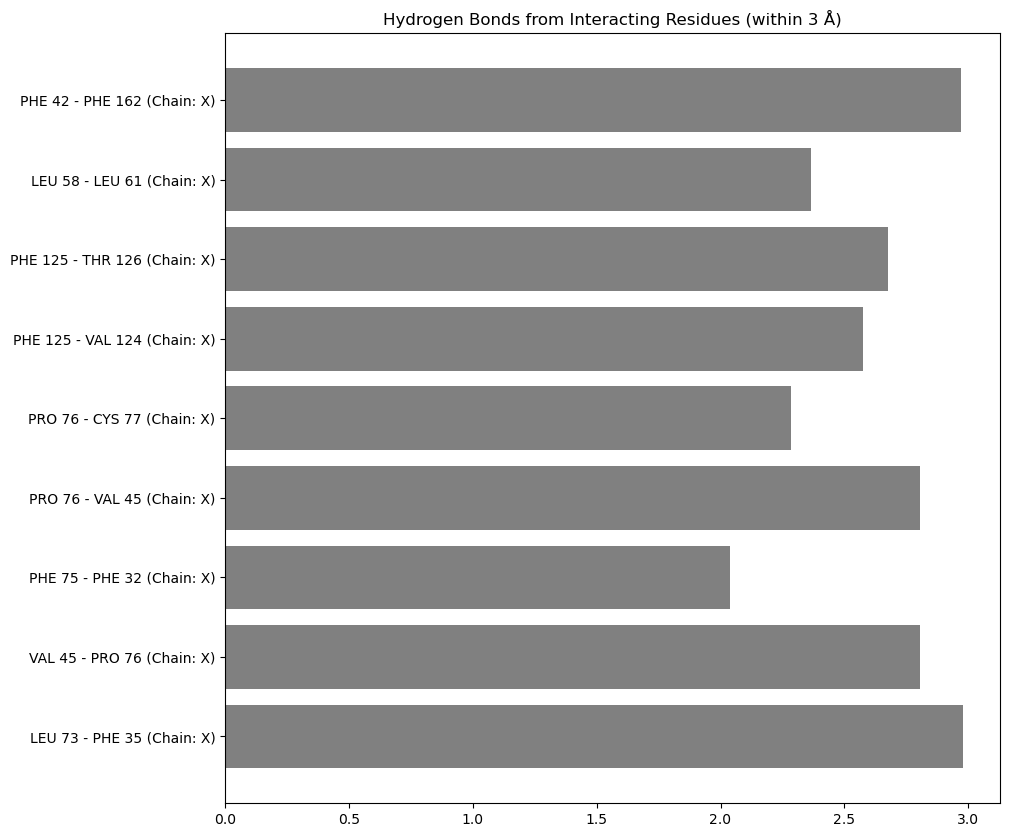

Plot saved to /home/hp/nayanika/github/GPX6/figures/h_bond_distance_74human.png


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the text file containing interacting residues
interacting_residues_file = "/home/hp/nayanika/github/GPX6/prep_structures/humansec/interacting_residues_74.txt"
# Define the path to the PDB file containing atomic coordinates
pdb_file_path = "/home/hp/nayanika/github/GPX6/prep_structures/original_humansec.pdb"

# Initialize lists to hold data for plotting
residue_pairs = []
distances = []
colors = []

# Specify the residue of interest (Chain X, Residue 74)
selected_residue = ("X", "74")

# Dictionary to map amino acid residues to their possible H-bond donor/acceptor atoms
h_bond_atoms = {
    'A': 'CA',
    'R': 'NH1, NH2',
    'N': 'NH2, O',
    'D': 'OD1, OD2',
    'C': 'SH',
    'Q': 'NH2, O',
    'E': 'OE1, OE2',
    'G': 'CA',
    'H': 'NE2',
    'K': 'NH1, NH2',
    'S': 'OH',
    'T': 'OH',
    'W': 'NE1, NH',
    'Y': 'OH',
}

# Function to calculate Euclidean distance between two atoms
def calculate_distance(atom1, atom2):
    return np.sqrt(np.sum((atom1 - atom2) ** 2))

# Read atomic coordinates from the PDB file
atomic_coordinates = {}
with open(pdb_file_path, "r") as pdb_file:
    for line in pdb_file:
        if line.startswith("ATOM") or line.startswith("HETATM"):
            atom_name = line[12:16].strip()  # Atom name
            res_name = line[17:20].strip()    # Residue name
            res_id = line[22:26].strip()       # Residue ID
            x = float(line[30:38].strip())     # X coordinate
            y = float(line[38:46].strip())     # Y coordinate
            z = float(line[46:54].strip())     # Z coordinate
            
            # Store coordinates in a dictionary keyed by residue
            key = (res_name, res_id)
            atomic_coordinates[key] = np.array([x, y, z])

# Read the interacting residues and calculate distances
cutoff = 3.0  # Cutoff distance for hydrogen bonds in Å
with open(interacting_residues_file, "r") as file:
    for line in file:
        chain, res_name, res_id = line.strip().split()
        res_name = res_name.upper()  # Ensure residue names are uppercase
        key = (res_name, res_id)
        
        # Check if the residue exists in the atomic coordinates
        if key in atomic_coordinates:
            print(f"Processing residue: {res_name} {res_id} (Chain: {chain})")  # Debugging output
            atom_types = h_bond_atoms.get(res_name, '').split(', ')
            for atom_type in atom_types:
                atom_coords = atomic_coordinates.get((res_name, res_id))
                if atom_coords is not None:
                    for other_key, other_coords in atomic_coordinates.items():
                        if other_key != key:
                            other_res_name, other_res_id = other_key
                            other_atom_types = h_bond_atoms.get(other_res_name, '').split(', ')
                            for other_atom_type in other_atom_types:
                                if atom_type in other_atom_type:
                                    distance = calculate_distance(atom_coords, other_coords)
                                    
                                    if distance <= cutoff:
                                        residue_pairs.append(f"{res_name} {res_id} - {other_res_name} {other_res_id} (Chain: {chain})")
                                        distances.append(distance)

                                        # Highlight the selected residue
                                        if (chain, res_id) == selected_residue:
                                            colors.append('red')  # Highlight the selected residue
                                        else:
                                            colors.append('blue' if 'NH' in atom_type else 'green' if 'OH' in atom_type else 'grey')

# Debugging output for the selected residue
print(f"Selected residue: {selected_residue}")
if distances:
    # Create the plot
    plt.figure(figsize=(10, 10))
    plt.barh(residue_pairs, distances, color=colors)
    plt.title("Hydrogen Bonds from Interacting Residues (within 3 Å)")
    output_path_plot = "/home/hp/nayanika/github/GPX6/figures/h_bond_distance_74human.png"
    plt.savefig(output_path_plot, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved to {output_path_plot}")
else:
    print("No hydrogen bond pairs found.")
